## Ejercicio 5.29
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_5.29.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

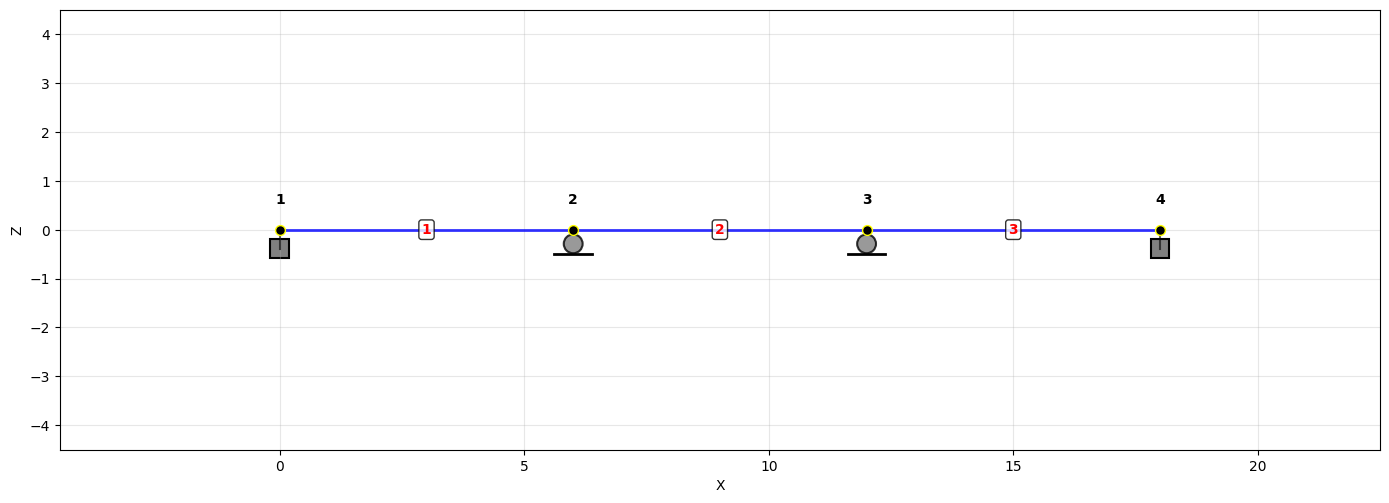

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 70 * 10 ** 6
A = 1
I = 225 * 10**-6

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=0)
system.defineNode(2, x=6, z=0)
system.defineNode(3, x=12, z=0)
system.defineNode(4, x=18, z=0)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=True) # restricción en los 3 GL
system.assignJoint.restrictions(4, ux=True, uz=True, ry=True) # restricción en los 3 GL
system.assignJoint.restrictions(2, ux=False, uz=True, ry=False)
system.assignJoint.restrictions(3, ux=False, uz=True, ry=False)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A, E=E, I=I)
system.defineElement(2, 2, 3, A=A, E=E, I=I)
system.defineElement(3, 3, 4, A=A, E=E, I=I)

# Asignación de Cargas
system.assignJoint.force(2, fx=0, fz=0, my=-150)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 4
Número de elementos: 3
Grados de libertad totales: 12
Grados de libertad restringidos (desplazamientos conocidos): 8 de 12
GL restringidos: [ 0  1  2  4  7  9 10 11]
Grados de libertad libres (fuerzas conocidas): 4 de 12
GL libres: [3 5 6 8]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (4x4):
  |         3 |          5 |          6 |          8 |

  |   23333333 |          0 |  -11666667 |          0 |
  |          0 |      21000 |          0 |       5250 |
  |  -11666667 |          0 |   23333333 |          0 |
  |          0 |       5250 |          0 |      21000 |
 
KAB (4x8):
  |         0 |          1 |          2 |          4 |    

In [4]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 0
PROPIEDADES
  Longitud: 6.000
  Área (A): 1.0000e+00
  Módulo elástico (E): 7.0000e+07
  Momento de inercia (I): 2.2500e-04
  Liberaciones:  Nodo i = NO | Nodo j = NO
  Orientación: C=1.000 | S=0.000

CARGAS APLICADAS:
  No hay cargas aplicadas

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  | 11666666.667 |      0.000 |      0.000 | -11666666.667 |      0.000 |      0.000 |
  |      0.000 |    875.000 |   2625.000 |      0.000 |   -875.000 |   2625.00

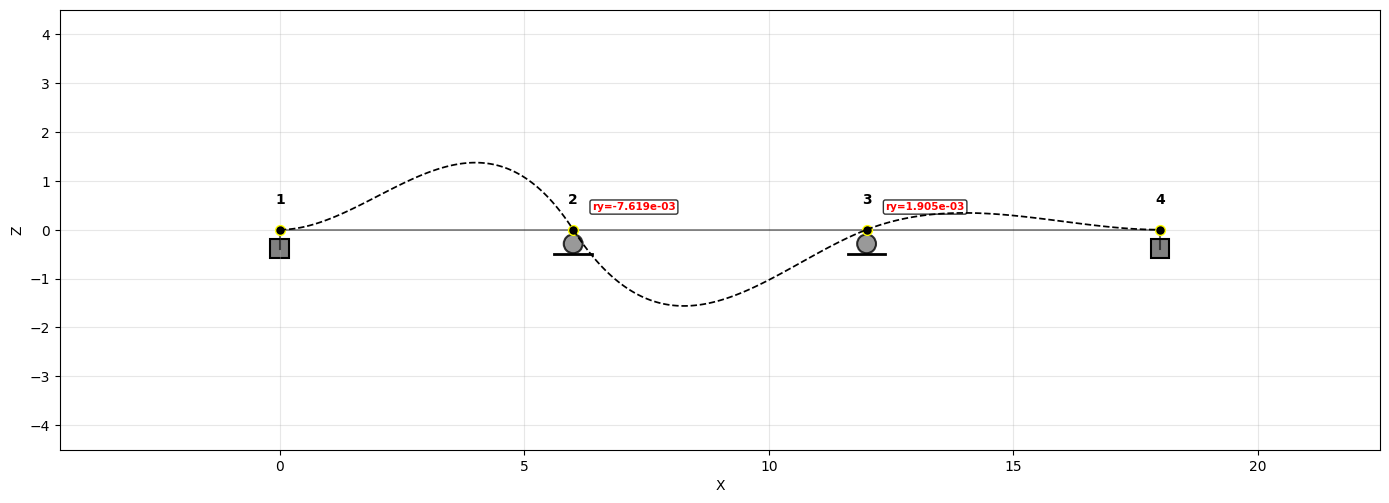

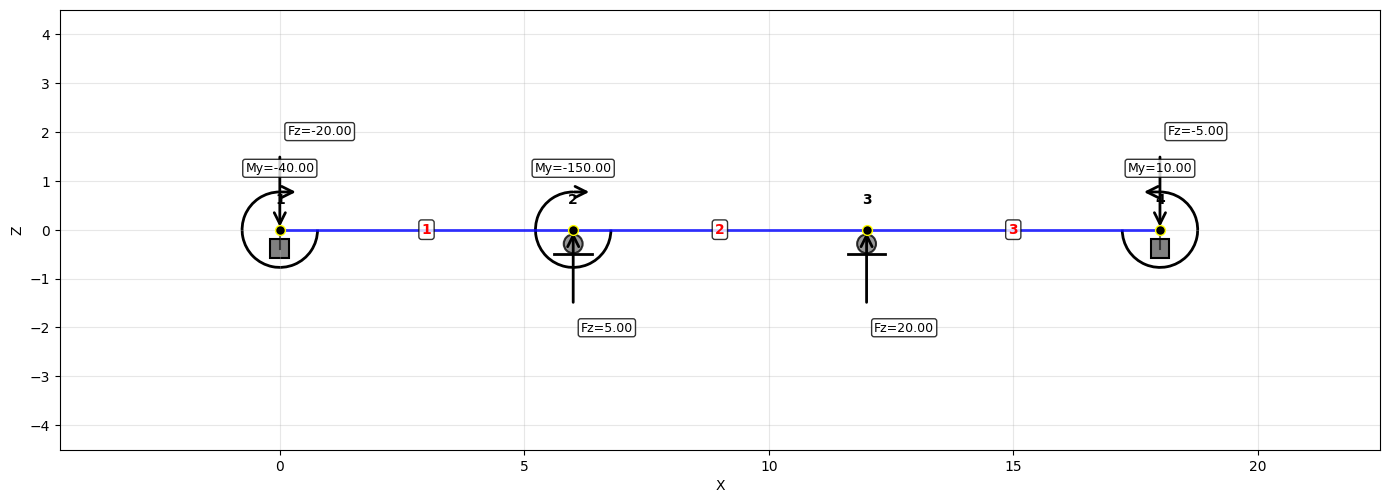

In [5]:
# Visualización de Resultados
plotter.showDeformedShape(escala=1)
plotter.showReactions()